In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
# We can override the default matplotlib styles with those of Seaborn
sns.set()

In [26]:
data = pd.read_csv('regression_data.csv', header=None)
data

,0,1
0,6.292929,33.029204
1,20.434343,94.117665
2,20.939394,94.286240
3,5.282828,30.425881
4,3.010101,21.471686
...,...,...
95,3.262626,23.485911
96,26.494949,128.020235
97,8.818182,35.866577
98,19.929293,96.974965


In [27]:
data.columns = ['x', 'y']
data

,x,y
0,6.292929,33.029204
1,20.434343,94.117665
2,20.939394,94.286240
3,5.282828,30.425881
4,3.010101,21.471686
...,...,...
95,3.262626,23.485911
96,26.494949,128.020235
97,8.818182,35.866577
98,19.929293,96.974965


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


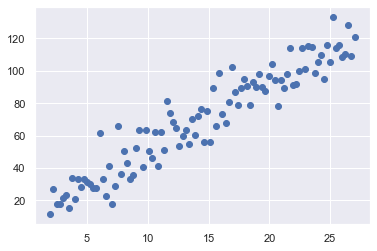

In [31]:
plt.scatter(data['x'], data['y'])

In [35]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['y']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['x']

In [36]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     909.7
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           2.16e-51
Time:                        17:44:10   Log-Likelihood:                -370.52
No. Observations:                 100   AIC:                             745.0
Df Residuals:                      98   BIC:                             750.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5128      2.212      4.752      0.000       6.122      14.903
x              4.1118      0.136     30.161      0.000       3.841       4.382
==============================================================================
Omnibus:                        4.478   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                4.147
Skew:                           0.498   Prob(JB):                        0.126
Kurtosis:                       3.061   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fitted vs Residuals

In [38]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm